# Surprise Housing
- We have to predict the price of houses based on the features available

## Important Steps
- Data was cleaned first by treating null values
- Skewed columns were removed
- Year columns were treated
- Dummy variables were not created, instead label Encoding was done for all categorical features because of Curse of dimensionality and making model simple
- Target variable was treated by log transformation
- Both Lasso and Ridge  Regression were applied on the dataset
- Final inference of coefficient importance, was made on same log transformed variable since log is monotonic increasing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
# setting max columns and rows  for better display
pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

In [4]:
# reading dataset
housing=pd.read_csv('surprise_housing_train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning
- Treating null values

In [6]:
null_percentage=(housing.isnull().sum()/len(housing.index))*100
null_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [7]:
# Filling numerical null columns with meaningful data
housing['LotFrontage'].fillna(0,inplace=True)
housing['MasVnrArea'].fillna(0,inplace=True)

In [8]:
# These all null values imply that particular item not present in the house
housing['Alley'].fillna('Not Present',inplace=True)
housing['MasVnrType'].fillna('Not Present',inplace=True)

housing['BsmtQual'].fillna('Not Present',inplace=True)
housing['BsmtCond'].fillna('Not Present',inplace=True)
housing['BsmtExposure'].fillna('Not Present',inplace=True)
housing['BsmtFinType1'].fillna('Not Present',inplace=True)
housing['BsmtFinType2'].fillna('Not Present',inplace=True)
housing['FireplaceQu'].fillna('Not Present',inplace=True)
housing['GarageType'].fillna('Not Present',inplace=True)
housing['GarageFinish'].fillna('Not Present',inplace=True)
housing['GarageQual'].fillna('Not Present',inplace=True)
housing['GarageCond'].fillna('Not Present',inplace=True)
housing['PoolQC'].fillna('Not Present',inplace=True)
housing['Fence'].fillna('Not Present',inplace=True)
housing['MiscFeature'].fillna('None',inplace=True)

In [9]:
# Filling it with max year since garage is never there, though the column is useless
housing['GarageYrBlt'].fillna(9999,inplace=True)

In [10]:
housing.dropna(inplace=True)

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
# Converting it to object type so that we can create dummies if we want 
housing['MSSubClass']=housing['MSSubClass'].astype('object')

## EDA

### Visualizing and fixing target variable Sales Price

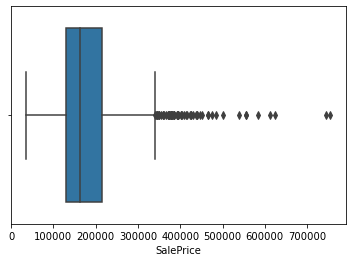

In [13]:
sns.boxplot(housing['SalePrice'])

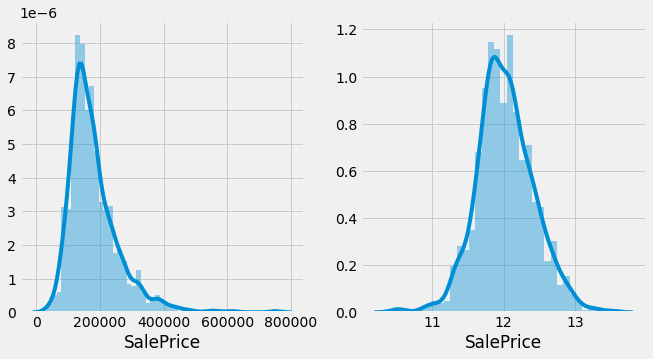

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot((housing['SalePrice']))
plt.subplot(1,2,2)
sns.distplot(np.log(housing['SalePrice']))

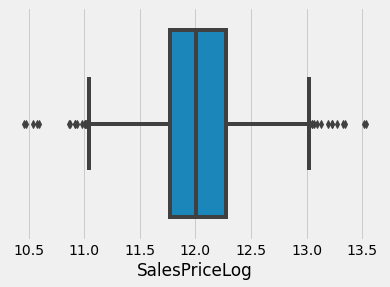

In [15]:
# Treating target variable
housing['SalesPriceLog']=np.log(housing['SalePrice'])
sns.boxplot(housing['SalesPriceLog'])

In [16]:
housing_categorical = housing.select_dtypes(include=['object'])
housing_numerical=housing.select_dtypes(include=['float64','int64'])


### Visualising Skewed Columns and treating them

In [17]:
# Highly skwed features, here we checked if one of the category contains more than 95 percent of data
ls=[]
for i in housing_categorical:
    v=housing[i].value_counts(normalize=True)
    for j in v:
        if( j>=0.95):
            ls.append(i)
            break
ls

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'MiscFeature']

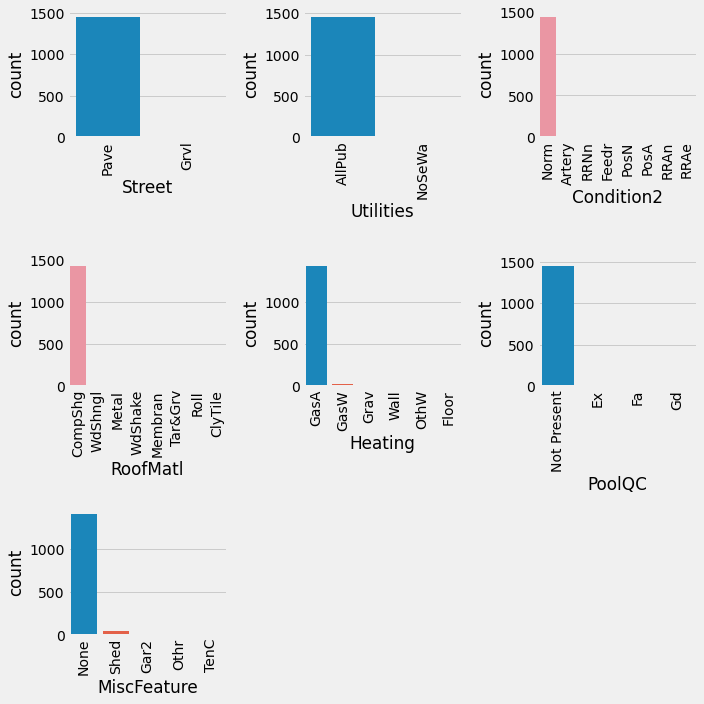

In [18]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,10))
for i in range(len(ls)):
    plt.subplot(3,3,i+1)
    ak=sns.countplot(housing[ls[i]])
    ak.set_xticklabels(ak.get_xticklabels(),rotation=90)
fig.tight_layout()
    

In [19]:
# Dropping Skewed columns
housing.drop(ls,axis=1,inplace=True)

### Visualising box plots and correlation for numerical features

In [20]:
housing_numerical.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalesPriceLog
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216


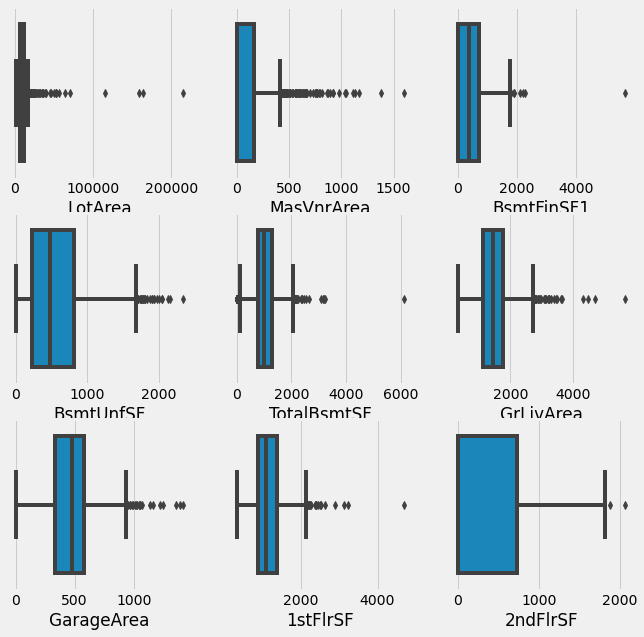

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot((housing['LotArea']))
plt.subplot(3,3,2)
sns.boxplot((housing['MasVnrArea']))
plt.subplot(3,3,3)
sns.boxplot(housing['BsmtFinSF1'])
plt.subplot(3,3,4)
sns.boxplot(housing['BsmtUnfSF'])
plt.subplot(3,3,5)
sns.boxplot(housing['TotalBsmtSF'])
plt.subplot(3,3,6)
sns.boxplot((housing['GrLivArea']))
plt.subplot(3,3,7)
sns.boxplot(housing['GarageArea'])
plt.subplot(3,3,8)
sns.boxplot(housing['1stFlrSF'])
plt.subplot(3,3,9)
sns.boxplot(housing['2ndFlrSF'])

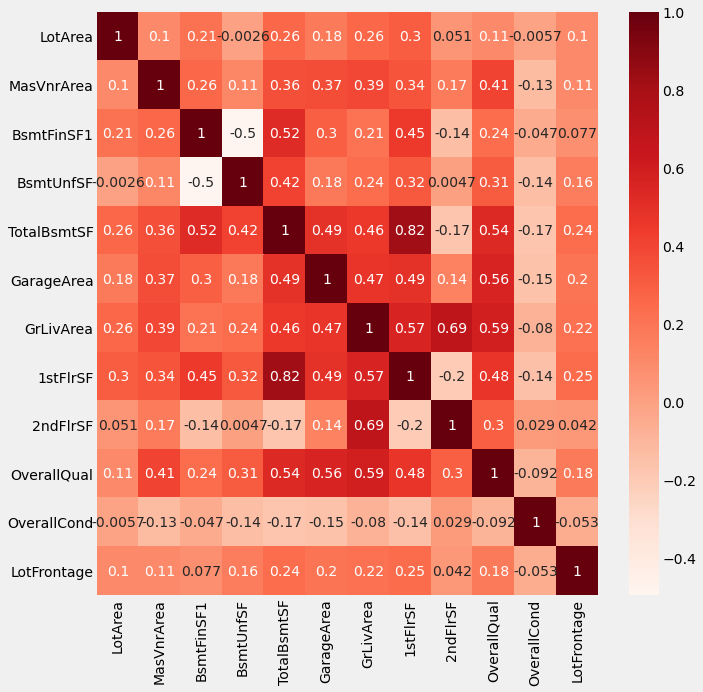

In [22]:
# Correaltion of numerical features
# 1stFloorSF is highly correlated with BsmntFloorSF
plt.figure(figsize=(10,10))
sns.heatmap(housing[['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','GarageArea','GrLivArea','1stFlrSF','2ndFlrSF','OverallQual','OverallCond','LotFrontage']].corr(),cmap='Reds',annot=True)

## Data Preparation

In [23]:
# Treating year columns
housing['Age']=datetime.datetime.now().year-housing['YearBuilt']

In [24]:
# Removing other year columns
housing.drop(['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt'],axis=1,inplace=True)

In [25]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,SalesPriceLog,Age
0,1,60,RL,65.0,8450,Not Present,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Not Present,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Not Present,0,2,WD,Normal,208500,12.247694,17
1,2,20,RL,80.0,9600,Not Present,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Not Present,0,5,WD,Normal,181500,12.109011,44
2,3,60,RL,68.0,11250,Not Present,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Not Present,0,9,WD,Normal,223500,12.317167,19
3,4,70,RL,60.0,9550,Not Present,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Not Present,0,2,WD,Abnorml,140000,11.849398,105
4,5,60,RL,84.0,14260,Not Present,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Not Present,0,12,WD,Normal,250000,12.429216,20


### Label Encoding

In [26]:
# Label Encoding of ordinal variables manually
label_encoding=['GarageCond','GarageQual','FireplaceQu','KitchenQual','HeatingQC','BsmtCond','BsmtQual','ExterCond','ExterQual']
ls={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not Present':0}
for i in label_encoding:
    housing[i]=housing[i].map(ls)


In [27]:
housing[label_encoding].head()

,GarageCond,GarageQual,FireplaceQu,KitchenQual,HeatingQC,BsmtCond,BsmtQual,ExterCond,ExterQual
0,3,3,0,4,5,3,4,3,4
1,3,3,3,3,5,3,4,3,3
2,3,3,3,4,5,3,4,3,4
3,3,3,4,4,4,4,3,3,3
4,3,3,3,4,5,3,4,3,4


In [28]:

housing['BsmtExposure']=housing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'Not Present':0})
housing['BsmtFinType1']=housing['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'Not Present':0})
housing['BsmtFinType2']=housing['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'Not Present':0})


In [29]:
# Label Encoding of other nominal variables
housing_categorical = housing.select_dtypes(include=['object'])
for i in housing_categorical:
    le=LabelEncoder()
    housing[i]=le.fit_transform(housing[i])

In [30]:
# Dropping useless variables
housing.drop(['SalePrice','Id'],axis=1,inplace=True)

In [31]:
# Splitting train and test
housing_train,housing_test = train_test_split(housing,
                                              train_size=0.7,
                                              test_size = 0.3, random_state=100)

In [32]:
housing_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalesPriceLog,Age
984,10,3,75.0,10125,1,3,3,4,0,11,2,2,0,5,5,1,9,10,2,0.0,3,3,1,0,0,0,0,0,0,0,0,0,3,1,4,1302,432,0,1734,0,0,2,0,4,2,4,8,6,0,0,1,3,2,539,3,3,2,0,0,0,0,0,0,4,0,8,0,4,11.744037,43
1416,14,4,60.0,11340,1,3,3,4,0,17,2,1,5,4,6,1,12,0,2,0.0,3,3,2,3,3,1,1,0,1,0,777,777,4,1,4,1246,1044,0,2290,0,0,2,0,4,2,3,11,6,0,0,5,3,2,560,3,3,0,0,0,114,0,0,0,4,0,4,8,4,11.715866,135
390,4,3,50.0,8405,0,3,3,4,0,7,2,0,0,5,8,1,8,8,2,0.0,3,3,0,3,4,1,3,241,4,391,229,861,5,1,4,961,406,0,1367,1,0,1,0,4,1,3,7,6,0,0,5,3,1,384,3,3,2,0,130,112,0,0,0,2,0,4,8,4,11.686879,120
877,5,3,74.0,8834,1,3,3,4,0,16,2,0,5,9,5,3,12,13,4,216.0,4,3,2,5,3,1,6,1170,1,0,292,1462,5,1,4,1462,762,0,2224,1,0,2,1,4,1,5,10,6,1,4,1,0,3,738,3,3,2,184,0,0,0,0,0,4,0,6,8,4,12.765688,16
567,0,3,70.0,10171,1,0,3,4,0,16,2,0,2,7,5,1,12,13,1,168.0,4,3,2,4,3,1,6,2,1,0,1515,1517,5,1,4,1535,0,0,1535,0,0,2,0,3,1,4,7,6,0,0,1,2,2,532,3,3,2,0,0,0,0,0,0,4,0,3,8,4,12.273731,16


### Scaling Train and Test

In [33]:
# Scaling Train 
cols=list(housing_train.columns)
scaler=MinMaxScaler()
housing_train[cols]=scaler.fit_transform(housing_train[cols])
housing_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalesPriceLog,Age
984,0.714286,0.75,0.239617,0.040455,0.5,1.0,1.0,1.0,0.0,0.458333,0.25,0.50,0.000000,0.444444,0.500,0.2,0.642857,0.666667,0.50,0.000,0.333333,0.333333,0.2,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,1.0,1.0,0.215278,0.209201,0.0,0.249039,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.666667,0.454545,1.0,0.000000,0.0,0.166667,1.000000,0.50,0.380113,0.6,0.6,1.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.636364,0.0,0.8,0.417599,0.239130
1416,1.000000,1.00,0.191693,0.046139,0.5,1.0,1.0,1.0,0.0,0.708333,0.25,0.25,0.714286,0.333333,0.625,0.2,0.857143,0.000000,0.50,0.000,0.333333,0.333333,0.4,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.000000,0.332620,0.127169,0.75,1.0,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.333333,0.727273,1.0,0.000000,0.0,0.833333,1.000000,0.50,0.394922,0.6,0.6,0.0,0.000000,0.00000,0.206522,0.0,0.0,0.0,1.0,0.0,0.272727,1.0,0.8,0.408435,0.905797
390,0.285714,0.75,0.159744,0.032409,0.0,1.0,1.0,1.0,0.0,0.291667,0.25,0.00,0.000000,0.444444,0.875,0.2,0.571429,0.533333,0.50,0.000,0.333333,0.333333,0.0,0.6,1.00,0.25,0.500000,0.042700,0.666667,0.265265,0.098031,0.140917,1.00,1.0,1.0,0.136343,0.196610,0.0,0.178517,0.333333,0.0,0.333333,0.0,0.500,0.333333,0.333333,0.363636,1.0,0.000000,0.0,0.833333,1.000000,0.25,0.270804,0.6,0.6,1.0,0.000000,0.23766,0.202899,0.0,0.0,0.0,0.5,0.0,0.272727,1.0,0.8,0.399006,0.797101
877,0.357143,0.75,0.236422,0.034416,0.5,1.0,1.0,1.0,0.0,0.666667,0.25,0.00,0.714286,0.888889,0.500,0.6,0.857143,0.866667,1.00,0.135,0.666667,0.333333,0.4,1.0,0.75,0.25,1.000000,0.207300,0.166667,0.000000,0.125000,0.239280,1.00,1.0,1.0,0.252315,0.369007,0.0,0.343198,0.333333,0.0,0.666667,0.5,0.500,0.333333,1.000000,0.636364,1.0,0.333333,0.8,0.166667,0.000000,0.75,0.520451,0.6,0.6,1.0,0.214702,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.454545,1.0,0.8,0.749926,0.043478
567,0.000000,0.75,0.223642,0.040670,0.5,0.0,1.0,1.0,0.0,0.666667,0.25,0.00,0.285714,0.666667,0.500,0.2,0.857143,0.866667,0.25,0.105,0.666667,0.333333,0.4,0.8,0.75,0.25,1.000000,0.000354,0.166667,0.000000,0.648545,0.248282,1.00,1.0,1.0,0.269213,0.000000,0.0,0.210799,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.363636,1.0,0.000000,0.0,0.166667,0.666667,0.50,0.375176,0.6,0.6,1.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.181818,1.0,0.8,0.589900,0.043478


In [34]:
#Scaling test,just transform
cols=list(housing_test.columns)
housing_test[cols]=scaler.transform(housing_test[cols])
housing_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalesPriceLog,Age
789,0.357143,0.75,0.000000,0.050185,0.5,0.0,0.666667,1.0,0.0,0.166667,0.25,0.0,0.714286,0.555556,0.875,0.2,0.428571,0.400000,0.25,0.098125,0.333333,0.333333,0.2,0.6,0.50,1.00,0.333333,0.100638,0.166667,0.0,0.113014,0.136170,0.75,1.0,1.0,0.139815,0.538015,0.0,0.316872,0.000000,0.0,0.666667,0.5,0.625,0.333333,0.666667,0.545455,1.0,0.000000,0.0,0.166667,0.000000,0.50,0.313117,0.6,0.6,1.0,0.155193,0.307130,0.000000,0.0,0.0,0.0,1.00,0.0,0.545455,1.0,0.8,0.546898,0.318841
425,0.357143,1.00,0.191693,0.008893,0.0,1.0,0.333333,1.0,0.0,0.708333,0.25,0.0,0.714286,0.666667,0.875,0.2,0.428571,0.400000,0.50,0.000000,0.333333,0.666667,0.2,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.278682,0.106547,0.75,1.0,1.0,0.077546,0.330266,0.0,0.182744,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.272727,1.0,0.666667,0.8,0.833333,1.000000,0.25,0.169252,0.6,0.6,0.5,0.000000,0.000000,0.228261,0.0,0.0,0.0,1.00,0.0,0.727273,1.0,0.8,0.440041,0.463768
204,0.285714,1.00,0.159744,0.009464,0.0,1.0,1.000000,1.0,0.0,0.708333,0.25,0.0,0.000000,0.444444,0.750,0.2,0.000000,0.000000,0.50,0.000000,0.333333,0.333333,0.2,0.6,0.75,0.25,0.333333,0.055280,0.166667,0.0,0.174658,0.117840,0.50,1.0,1.0,0.080556,0.273123,0.0,0.162567,0.000000,0.0,0.333333,0.5,0.250,0.333333,0.333333,0.181818,1.0,0.000000,0.0,0.833333,1.000000,0.25,0.169252,0.6,0.6,1.0,0.000000,0.063985,0.000000,0.0,0.0,0.0,0.75,0.0,0.272727,1.0,0.8,0.373425,0.456522
118,0.357143,0.75,0.287540,0.050985,0.5,1.0,1.000000,0.0,0.0,0.833333,0.25,0.0,0.714286,0.666667,0.500,0.6,0.642857,0.666667,0.50,0.000000,0.333333,0.333333,0.4,0.8,0.75,0.50,1.000000,0.260454,0.166667,0.0,0.086901,0.273813,0.75,1.0,1.0,0.307176,0.737530,0.0,0.534973,0.333333,0.0,1.000000,0.0,0.625,0.333333,0.666667,0.727273,1.0,0.666667,0.6,0.166667,1.000000,0.75,0.418900,0.6,0.6,1.0,0.428238,0.000000,0.000000,0.0,0.0,0.0,1.00,0.0,0.363636,1.0,0.8,0.720777,0.144928
244,0.357143,0.75,0.000000,0.034631,0.5,0.0,1.000000,1.0,0.0,0.833333,0.25,0.0,0.714286,0.666667,0.500,0.2,0.857143,0.866667,0.50,0.000000,0.666667,0.333333,0.4,0.8,0.75,0.25,1.000000,0.123140,0.166667,0.0,0.108305,0.155155,1.00,1.0,1.0,0.196759,0.430024,0.0,0.321291,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.454545,1.0,0.666667,0.4,0.166667,0.666667,0.50,0.326516,0.6,0.6,1.0,0.000000,0.237660,0.000000,0.0,0.0,0.0,1.00,0.0,0.363636,1.0,0.8,0.575924,0.115942


In [35]:
X_train=housing_train.drop('SalesPriceLog',axis=1)
y_train=housing_train['SalesPriceLog']

In [36]:
X_test=housing_test.drop('SalesPriceLog',axis=1)
y_test=housing_test['SalesPriceLog']

### Trying RFE on the Data

In [37]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,30)
rfe=rfe.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('MSZoning', False, 29),
 ('LotFrontage', False, 15),
 ('LotArea', True, 1),
 ('Alley', True, 1),
 ('LotShape', False, 31),
 ('LandContour', False, 11),
 ('LotConfig', False, 39),
 ('LandSlope', False, 10),
 ('Neighborhood', False, 14),
 ('Condition1', False, 23),
 ('BldgType', False, 16),
 ('HouseStyle', False, 33),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('RoofStyle', False, 25),
 ('Exterior1st', False, 26),
 ('Exterior2nd', False, 24),
 ('MasVnrType', False, 40),
 ('MasVnrArea', False, 35),
 ('ExterQual', False, 17),
 ('ExterCond', False, 8),
 ('Foundation', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 21),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', False, 19),
 ('BsmtFinType2', False, 3),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 20),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 28),
 ('Electrical', False, 37),
 ('1stFlrSF', False, 7),
 ('2ndFlrSF', True, 1),
 ('Low

In [39]:
col=X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'Alley', 'OverallQual', 'OverallCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF',
       'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageCars', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Age'],
      dtype='object')

In [40]:
x_train_rfe=X_train[col]
x_train_sm=sm.add_constant(x_train_rfe)

In [41]:
lr=sm.OLS(y_train,x_train_sm)
model=lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalesPriceLog   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     243.6
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:46:00   Log-Likelihood:                 1708.1
No. Observations:                1021   AIC:                            -3354.
Df Residuals:                     990   BIC:                            -3201.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0441      0.021      2.087      0.037       0.003       0.086
MSSubClass       -0.0341      0.006     -5.591      0.000      -0.046      -0.022
LotArea           0.1396      0.033      4.223      0.000       0.075       0.205
Alley             0.0379      0.012      3.145      0.002       0.014       0.061
OverallQual       0.1887      0.018     10.720      0.000       0.154       0.223
OverallCond       0.1186      0.012      9.553      0.000       0.094       0.143
Foundation        0.0260      0.014      1.878      0.061      -0.001       0.053
BsmtQual          0.0322      0.014      2.302      0.022       0.005       0.060
BsmtExposure      0.0227      0.007      3.494      0.000       0.010       0.036
BsmtFinType1      0.0234      0.006      4.198      0.000       0.012       0.034
TotalBsmtSF       0.0377      0.045      0.844      0.399      -0.050       0.125
HeatingQC         0.0308      0.007      4.118      0.000       0.016       0.045
2ndFlrSF         -0.0382      0.018     -2.138      0.033      -0.073      -0.003
GrLivArea         0.3943      0.047      8.313      0.000       0.301       0.487
BsmtFullBath      0.0515      0.011      4.695      0.000       0.030       0.073
FullBath          0.0495      0.013      3.725      0.000       0.023       0.076
HalfBath          0.0234      0.009      2.666      0.008       0.006       0.041
KitchenAbvGr     -0.0433      0.027     -1.611      0.108      -0.096       0.009
KitchenQual       0.0329      0.010      3.328      0.001       0.013       0.052
TotRmsAbvGrd      0.0502      0.019      2.606      0.009       0.012       0.088
Functional        0.0298      0.010      3.044      0.002       0.011       0.049
FireplaceQu       0.0288      0.005      5.718      0.000       0.019       0.039
GarageCars        0.0801      0.013      6.249      0.000       0.055       0.105
GarageQual        0.0564      0.037      1.508      0.132      -0.017       0.130
GarageCond       -0.0432      0.037     -1.161      0.246      -0.116       0.030
WoodDeckSF        0.0227      0.011      2.093      0.037       0.001       0.044
EnclosedPorch     0.0225      0.014      1.565      0.118      -0.006       0.051
3SsnPorch         0.0233      0.024      0.982      0.327      -0.023       0.070
ScreenPorch       0.0413      0.013      3.061      0.002       0.015       0.068
PoolArea         -0.2056      0.032     -6.339      0.000      -0.269      -0.142
Age              -0.0865      0.014     -6.005      0.000      -0.115      -0.058
==============================================================================
Omnibus:                      644.022   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23309.953
Skew:                          -2.320   Prob(JB):         

In [42]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
22,GarageQual,225.00
23,GarageCond,222.00
12,GrLivArea,58.00
3,OverallQual,50.92
6,BsmtQual,41.80
19,Functional,38.24
16,KitchenAbvGr,36.57
9,TotalBsmtSF,34.01
4,OverallCond,25.19
14,FullBath,24.39


## Ridge Regression

### Model Training

In [43]:
params = {'alpha': [0.00001,0.0001,0.0002,0.0003, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006782,9.084253e-03,0.000598,0.000489,1e-05,{'alpha': 1e-05},-0.033243,-0.035963,-0.034990,-0.032828,-0.031149,-0.033635,0.001688,17,-0.030704,-0.029826,-0.028273,-0.027699,-0.030770,-0.029454,0.001257
1,0.001995,2.780415e-07,0.000999,0.000002,0.0001,{'alpha': 0.0001},-0.033242,-0.035963,-0.034990,-0.032827,-0.031149,-0.033634,0.001688,16,-0.030704,-0.029826,-0.028273,-0.027699,-0.030770,-0.029454,0.001258
2,0.000216,4.322052e-04,0.003238,0.006475,0.0002,{'alpha': 0.0002},-0.033242,-0.035963,-0.034990,-0.032827,-0.031149,-0.033634,0.001688,15,-0.030704,-0.029826,-0.028273,-0.027699,-0.030770,-0.029455,0.001258
3,0.002022,3.125782e-03,0.000000,0.000000,0.0003,{'alpha': 0.0003},-0.033242,-0.035963,-0.034990,-0.032827,-0.031149,-0.033634,0.001688,14,-0.030704,-0.029826,-0.028273,-0.027699,-0.030771,-0.029455,0.001258
4,0.002429,3.913635e-03,0.001604,0.003208,0.001,{'alpha': 0.001},-0.033242,-0.035964,-0.034989,-0.032827,-0.031149,-0.033634,0.001688,13,-0.030705,-0.029827,-0.028273,-0.027700,-0.030771,-0.029455,0.001258


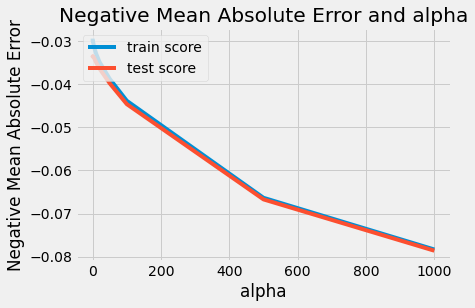

In [45]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [46]:
y_train_pred=model_cv.predict(X_train)

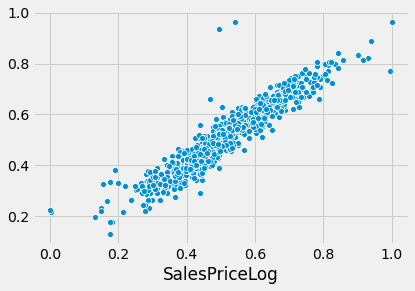

In [47]:
sns.scatterplot(y_train,y_train_pred)

In [48]:
model_cv.best_params_

{'alpha': 0.4}

### Model Evaluation

In [49]:
# Train R2 score
r2=r2_score(y_train,y_train_pred)
r2

0.8872675301596586

In [50]:
y_test_pred=model_cv.predict(X_test)

In [51]:
# Test R2 Score
r2=r2_score(y_test,y_test_pred)
r2

0.8612444243913489

### Ridge Regression
- Train Score: 0.8872
- Test Score : 0.8612
- best alpha: 0.4

### Feature importance in Ridge Regression

In [52]:
# Seeing importance of variables
ridge_coef=pd.DataFrame(model_cv.best_estimator_.coef_,columns=['Coeff'])
ridge_coef['name']=list(X_train.columns)
ridge_coef['importance']=np.absolute(ridge_coef['Coeff'])*100

In [53]:
ridge_coef.sort_values(by='importance',ascending=False)

,Coeff,name,importance
13,0.176386,OverallQual,17.638634
35,0.145464,1stFlrSF,14.546406
38,0.141173,GrLivArea,14.117315
62,-0.135267,PoolArea,13.526694
14,0.106626,OverallCond,10.662581
52,0.073386,GarageCars,7.338564
3,0.073092,LotArea,7.309206
46,0.058240,TotRmsAbvGrd,5.824013
39,0.057425,BsmtFullBath,5.742525
68,-0.053953,Age,5.395311


### Top 5 Important variables 
- OverallQual : 17%
- 1stFlrSF : 14%
- GrLivArea : 14%
- PoolArea : 13% 
- OverallCond : 10%

## Lasso Regression


### Model Training

In [54]:
lasso = Lasso()
#X_train_1=X_train.drop(['GrLivArea','GarageCars','OverallQual','PoolArea','OverallCond'],axis=1)
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033542,0.010314,0.003126,0.006251,1e-05,{'alpha': 1e-05},-0.033116,-0.035939,-0.034750,-0.032662,-0.031188,-0.033531,0.001656,3,-0.030708,-0.029858,-0.028250,-0.027683,-0.030779,-0.029456,0.001271
1,0.004313,0.006092,0.003331,0.006158,0.0001,{'alpha': 0.0001},-0.032870,-0.035665,-0.034503,-0.031761,-0.032145,-0.033389,0.001476,1,-0.031158,-0.030531,-0.028916,-0.028182,-0.031266,-0.030011,0.001242
2,0.005191,0.000994,0.001188,0.000750,0.0002,{'alpha': 0.0002},-0.032630,-0.035733,-0.035036,-0.031631,-0.032590,-0.033524,0.001576,2,-0.031887,-0.031165,-0.029620,-0.029108,-0.031842,-0.030724,0.001151
3,0.002799,0.001471,0.000598,0.000489,0.0003,{'alpha': 0.0003},-0.032623,-0.036308,-0.035386,-0.031739,-0.033150,-0.033841,0.001724,4,-0.032548,-0.031787,-0.030286,-0.029798,-0.032439,-0.031372,0.001127
4,0.000000,0.000000,0.000000,0.000000,0.001,{'alpha': 0.001},-0.034693,-0.040325,-0.038794,-0.034340,-0.036549,-0.036940,0.002318,5,-0.036522,-0.035712,-0.034482,-0.034169,-0.036300,-0.035437,0.000951


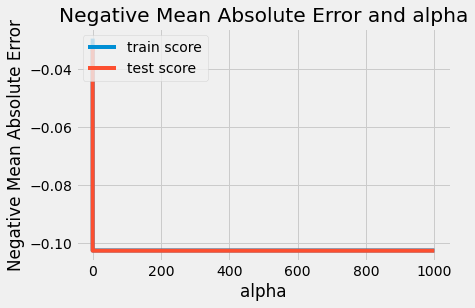

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
y_train_pred=model_cv.predict(X_train)

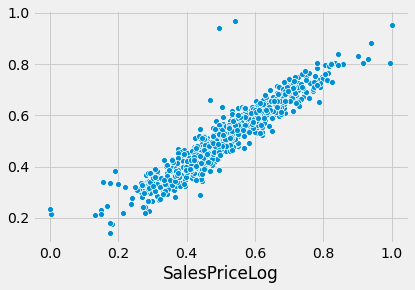

In [58]:
sns.scatterplot(y_train,y_train_pred)

### Model Evaluation

In [59]:
# Train R2 Score
r2=r2_score(y_train,y_train_pred)
r2

0.8848664640068717

In [60]:
y_test_pred=model_cv.predict(X_test)

In [61]:
# Test R2 Score
r2=r2_score(y_test,y_test_pred)
r2

0.8675050548538183

In [62]:
 # Best alpha ()
model_cv.best_params_

{'alpha': 0.0001}

### Lasso Regression
- Train Score: 0.8848
- Test Score : 0.8675
- best alpha: 0.0001

### Feature importance in Lasso Regression

In [63]:
lasso_coef=pd.DataFrame(model_cv.best_estimator_.coef_,columns=['Coeff'])
lasso_coef['name']=list(X_train.columns)
lasso_coef['importance']=np.absolute(lasso_coef['Coeff'])*100

In [64]:
lasso_coef.sort_values(by='importance',ascending=False)

,Coeff,name,importance
38,0.278839,GrLivArea,27.883853
13,0.192709,OverallQual,19.270899
62,-0.113195,PoolArea,11.319487
14,0.095560,OverallCond,9.556019
52,0.082862,GarageCars,8.286227
35,0.066156,1stFlrSF,6.615554
68,-0.056425,Age,5.642458
39,0.050094,BsmtFullBath,5.009368
41,0.046236,FullBath,4.623621
3,0.045689,LotArea,4.568935


### Top 5 Important variables 
- GrLivArea : 27%
- OverallQual : 19%
- PoolArea : 11%
- OverallCond : 9%
- GarageCars : 8%
##### These variables are important when predicting house prices,